# Lab 1: Introduction to Histogramming in ROOT

![alt-text](http://rsta.royalsocietypublishing.org/content/roypta/373/2032/20140384/F23.large.jpg?width=800&height=600&carousel=1 "")


## Table of Contents
1. **[Sample Histograms](#sample-histograms)**
2. **[Creating a Histogram](#creating-histogram)**  
   2.1. [Exercise](#create-hist-exercise)  
3. **[Filling Histograms](#filling-histograms)**  
   3.1. [Fill Method](#fill-method)  
   3.2. [Random Method](#random-method)  
   3.3. [Exercise](#fill-hist-exercise)  
4. **[Displaying Histograms](#display-histograms)**  
   4.1. [TCanvas](#tcanvas)  
   4.2. [Draw()](#draw)  
   4.3. [Exercise](#draw-exercise)  

## 1. Sample Histograms <a name="sample-histograms" />
This is an example of what we can achieve with histogramming within ROOT. There is much more you can learn about histograms within ROOT that we will not cover. This sample code will be broken down and explained throughout this lab.

In [12]:
# First need to import ROOT
import ROOT

Info in <TCanvas::Print>: png file two_histogram_surf.png has been created


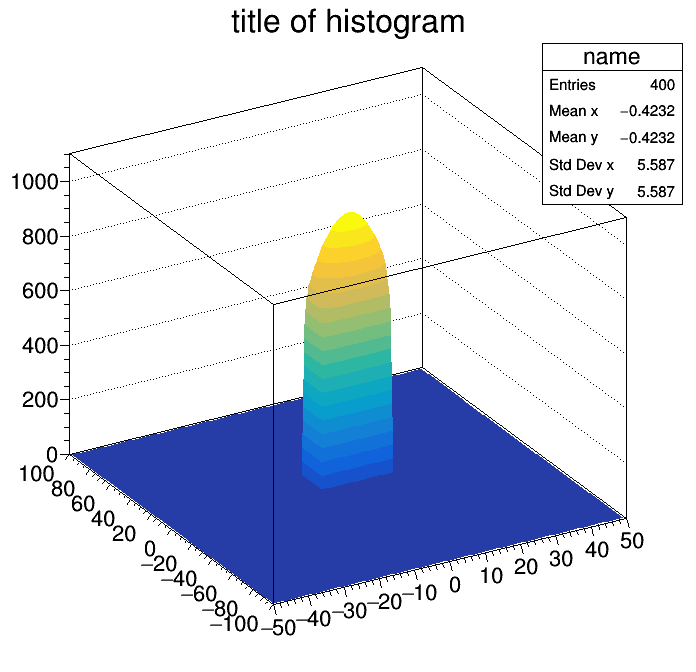

In [13]:
# 1D Histogram
one_d_hist = ROOT.TH1F("1d", "Histogram from a Gaussian", 100, -3, 3)
one_d_hist.FillRandom("gaus", 10000)

# 2D Histogram
number_of_bins_x = number_of_bins_y = 100
two_d_histogram = ROOT.TH2S("name", "title of histogram", number_of_bins_x, -50, 50, number_of_bins_y, -100, 100)
for x in range(-10, 10):
    for y in range(-10, 10):
        two_d_histogram.Fill(x, y, -x**2 - y**2 + 500)
        
# 3D Histogram
three_d_histogram = ROOT.TH3F("h3", "h3 title", 80, 0.0, 1.0, 100, -2.0, 2.0,
                       50, 0.0, 3.0)
# create the TCanvas to paint onto
canvas = ROOT.TCanvas("canvas_name", "canvas_name", 700, 700)

# plot the 2D histogram as a 3D surface
two_d_histogram.Draw("SURF2")
canvas.SaveAs("two_histogram_surf.png")
canvas.Draw()

Info in <TCanvas::Print>: png file two_histogram_cont.png has been created


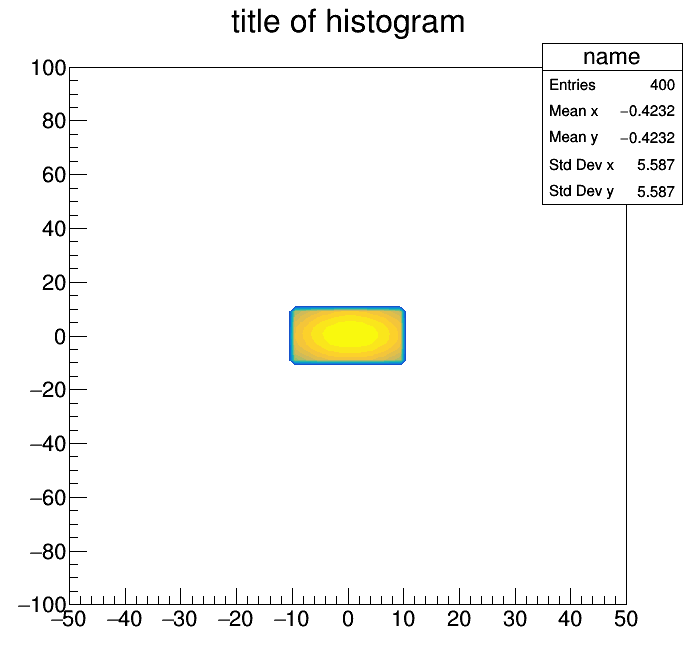

In [14]:
# plot the 2D histogram as countour lines
two_d_histogram.Draw("CONT0")
canvas.SaveAs("two_histogram_cont.png")
canvas.Draw()

Info in <TCanvas::Print>: png file one_d_histogram.png has been created


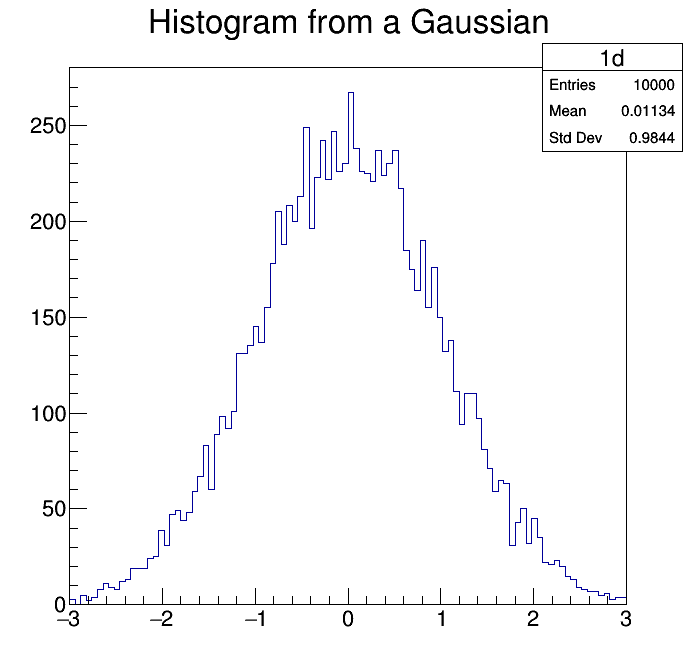

In [15]:
# plot the 1D histogram
one_d_hist.Draw()
canvas.SaveAs("one_d_histogram.png")
canvas.Draw()

## 2. Creating a Histogram <a name="creating-histogram" />
There are multiple classes that may be used to create a histogram object in ROOT. The nomenclature for these objects is as follows: THNX, where N is the number of dimensions, and X is the data type being used to store the bin content (C for byte, S for short, I for integer, F for float, D for double). For example:
```python
histogram = ROOT.TH2S("name", "title of histogram", 100 -50, 50, 100 -100, 100)
```
This creates a 2D histogram that has the name "name", a title of "title of histogram", 100 bins in the x and y directions, ranges from -50 to 50 in the x direction and from -100 to 100 in the y direction, and uses a short to store each bin content (up to 65,535 for each bin). This means in the x direction the bins have a width of 1 and in the y direction a width of 2.

### 2.1 Exercise: <a name="create-hist-exercise" />  
Create a 3D histogram that stores bin contents with a integer that covers the intervals $x \in [-1,1]$, $y \in [-50,50]$, and $z \in [30,80]$ with a bin width in the x direction of 0.001, y direction of 2, and z direction of 0.25. Note: $\in$ can be read roughly as "is a member of" or "lies in".

In [37]:
histogram = ROOT.THNX("","",)

AttributeError: THNX

The base class for all ROOT histograms is the [**TH1** class](https://root.cern.ch/doc/master/classTH1.html), which means two-dimensional and three-dimensional histograms are treated as extensions to a one-dimensional histogram. There are multiple constructors for one-dimensional, two-dimensional, and three-dimensional histograms. These vary from taking projections of higher dimensional histograms to obtain a lower dimensional histogram, defining variable bin widths, and cloning histograms, to name a few. We will not explictly be required to use any of these but feel free to read [here](https://root.cern.ch/root/htmldoc/guides/users-guide/Histograms.html#creating-histograms) for more information.

## 3. Filling Histograms <a name="filling-histograms" />
### 3.1 Fill Method <a name="fill-method" />
A histogram can be filled in different ways. The most common way of filling a histogram is using the `Fill()` method.
```python
# one-dimensional
h1.Fill(x);
h1.Fill(x,w); # with weight
# two-dimensional
h2.Fill(x,y);
h2.Fill(x,y,w);
# three-dimensional
h3.Fill(x,y,z);
h3.Fill(x,y,z,w);
```
This fills the histogram by calculating what bin needs to be incremented by w or 1, if w is not given, for the given x, y, and z values. Every type of histogram can have positive and negative bin contents. Using the example from above:
```python
for x in range(-10, 10):
    for y in range(-10, 10):
        two_d_histogram.Fill(x, y, -x**2 - y**2 + 500)
```
Here, this two-dimensional histogram is being filled from -10 to 10 in the x and y regions and is being filled according to the function $f(x,y) = -(x^2 + y^2) + 500$. 

### 3.2 Random Method <a name="random-method" />
The `FillRandom()` function can be used to randomly fill a histogram based on an existing `TF1` (the object used to represent a function) function or `TH1` histogram. From the example above:
```python
one_d_hist = ROOT.TH1F("1d", "Histogram from a Gaussian", 100, -3, 3)
one_d_hist.FillRandom("gaus", 10000)
```
Here "gaus" is a predefined `TF1` object within ROOT that is a Guassian distribution with a mean of 0 ($\mu = 0$) and a standard deviation of 1 ($\sigma = 1$): $$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{-\left(x-\mu\right)^2}{2\sigma^2}}$$
We randomly sampled this function 10,000 times and used these numbers to fill the histogram. 

### 3.3 Exercise:  <a name="fill-hist-exercise" />
Use the given `TF2` function object to randomly sample a two-dimensional histogram 10,000 times over the regions -5 to 5 with a bin count of 100 for both x and y. Next, use the histogram from the projected x-axis of the two-dimensional histogram to randomly sample a one-dimensional histogram over the region 0 to 5, 10,000 times with a bin count of 100. Lastly, use the supplied list to fill a one-dimensional histogram. 

In [17]:
function = ROOT.TF2("2d-gauss","2-D Gaussian Distribution",0,10,0,10); 
function.SetParameters(1,5,2,5,2); #amplitude, meanx,sigmax,meany,sigmay
function = ROOT.TF2("func", "3*cos(2.5 * (x^2 + y^2)^(1/2))/(exp(0.1*(x^2 + y^2)))", -5, 5, -5, 5)
a_list = [0, 0, 1, 4, 5, 6, 2, 1, 2, 1, 0 , 8, 9, 5, 7, 4,6, 5, 7, 8, 2, 3, 1, 6, 7, 8, 2, 9, 2, 8, 1, 1, 0, 0, 2, 0, 0]

# Create and fill the 2-D histogram from the above TF2 object
hist_from_func = ROOT.

# The projected histogram from hist_from_func
h1 = hist_from_func.ProjectionX()
# Create and fill the 1-D histogram from h1 
hist_from_hist = ROOT.

# Create and fill the 1-D histogram from a_list
hist_from_list = ROOT.



SyntaxError: invalid syntax (<ipython-input-17-b11abc307731>, line 7)

## 4. Displaying Histograms <a name="display-histograms" />
### 4.1 TCanvas <a name="tcanvas" />
The `TCanvas` object is the object that represents a place to draw function and histograms, and anything else you can think of wanting to display on your computer's screen. It can be thought of in the literal sense as a canvas in which you can draw on. There is a lot of functionality within the `TCanvas` object that will not be covered here, but a link for a more in depth overview of `TCanvas` is [here](https://root.cern.ch/doc/master/classTCanvas.html).

To create a `TCanvas` object, we will follow the familiar prescription with `TH1` and `TF1` objects.
```python
canvas = ROOT.TCanvas("name", "title", size_x, size_y)
```
where `size_x` and `size_y` are integers representing the x and y dimensions of the canvas in pixels.

### 4.2 Draw() <a name="draw" />
The `Draw()` method in `TH1` can be used to paint the histogram onto a canvas. This will overwrite anything that was previously painted on the canvas. There are ways in which you can segment a canvas into multiple **Pads** if you want to paint multiple items to a single canvas. We will not cover this since it is not necessary for our purposes, although this isn't incredibly difficult to do. If we have a `TH1` histogram called `h1`, then to paint this histogram onto the `TCanvas` named `canvas` we would type:

```python
h1.Draw()
```

Note we did not refence `canvas` anywhere. This is because `Draw()` will simply paint onto the `TCanvas` that was last created and the canvas updates automatically. However, this does not work in the *Jupyter Notebook* environment. Therefore, you need to tell the `TCanvas` to update as well.

```python
canvas.Draw()
```

The `Draw()` method can have options passed as arguments to change how the histogram will be painted. We will not cover these as there are tons of them but a full listing can be seen [here](https://root.cern.ch/root/htmldoc/guides/users-guide/Histograms.html#drawing-histograms). 

To save this painting so that we can look at it later, we use the `SaveAs()` method in `TCanvas` (inherited from `TPad`). A full list of the file formats that are accepted is:
* if filename is "", the file produced is padname.ps
* if filename starts with a dot, the padname is added in front
* if filename contains .eps, an Encapsulated Postscript file is produced
* if filename contains .pdf, a PDF file is produced
* if filename contains .svg, a SVG file is produced
* if filename contains .tex, a TeX file is produced
* if filename contains .gif, a GIF file is produced
* if filename contains .gif+NN, an animated GIF file is produced See comments in TASImage::WriteImage for meaning of NN and other .gif sufix variants
* if filename contains .xpm, a XPM file is produced
* if filename contains .png, a PNG file is produced
* if filename contains .jpg, a JPEG file is produced NOTE: JPEG's lossy compression will make all sharp edges fuzzy.
* if filename contains .tiff, a TIFF file is produced
* if filename contains .C or .cxx, a C++ macro file is produced
* if filename contains .root, a Root file is produced
* if filename contains .xml, a XML file is produced

To save our painting of `h1`, we could do:
```python
canvas.SaveAs("h1.png")
```

### 4.3 Exercise:  <a name="draw-hist-exercise" />
Draw the three histograms created in [3.3](#fill-hist-exercise) and h1. Hint: Use option "SURF2" as in the opening example for 2D histograms

In [ ]:
# Type code here